In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from continuous_probabalistic_methods import get_lower_upper_bounds

In [2]:
df = pd.read_csv('lemonade.csv')

In [3]:
df

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales
0,1/1/17,Sunday,27.0,2.00,15,0.5,10
1,1/2/17,Monday,28.9,1.33,15,0.5,13
2,1/3/17,Tuesday,34.5,1.33,27,0.5,15
3,1/4/17,Wednesday,44.1,1.05,28,0.5,17
4,1/5/17,Thursday,42.4,1.00,33,0.5,18
...,...,...,...,...,...,...,...
360,12/27/17,Wednesday,42.7,1.00,33,0.5,19
361,12/28/17,Thursday,37.8,1.25,32,0.5,16
362,12/29/17,Friday,39.5,1.25,17,0.5,15
363,12/30/17,Saturday,30.9,1.43,22,0.5,13


In [4]:
df = df[['Temperature', 'Rainfall', 'Flyers', 'Sales']]

In [5]:
df.dtypes

Temperature    float64
Rainfall       float64
Flyers           int64
Sales            int64
dtype: object

## Initial exploration

Temperature


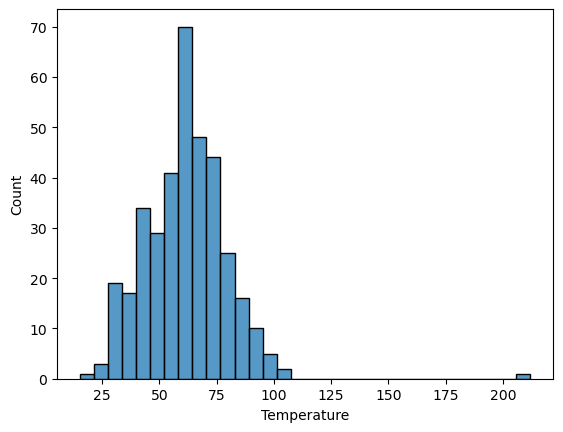

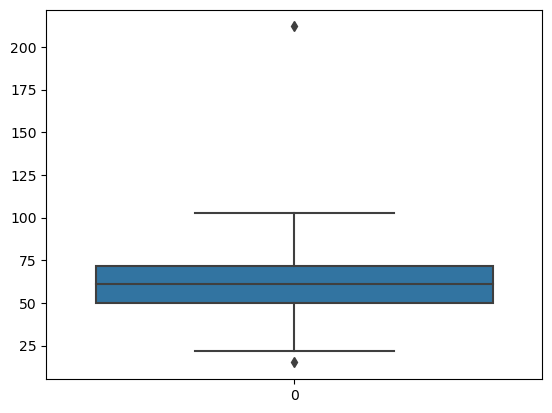

Rainfall


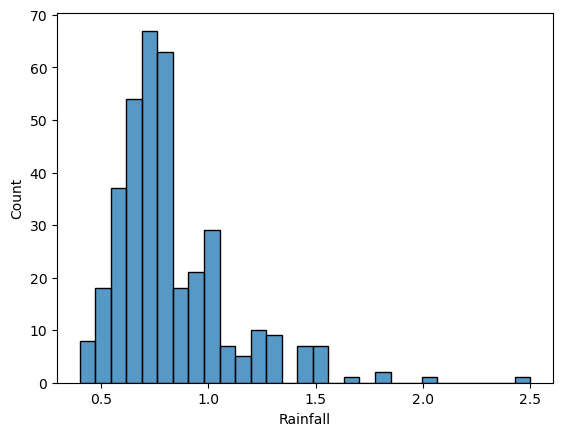

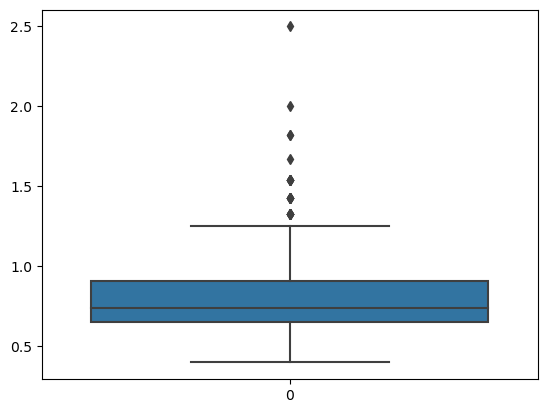

Flyers


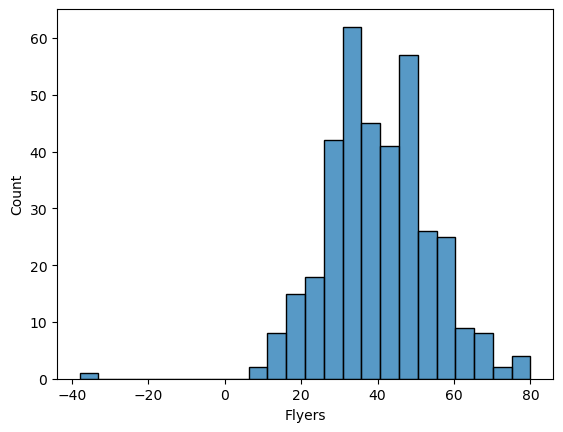

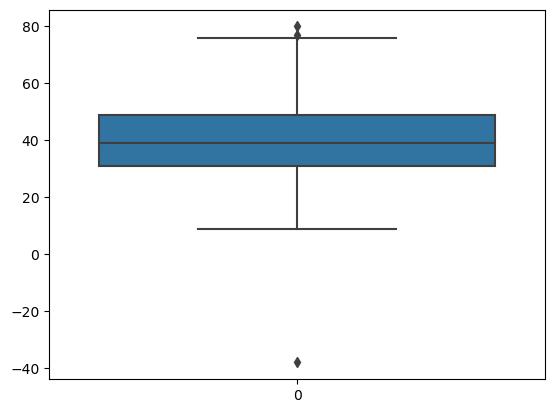

Sales


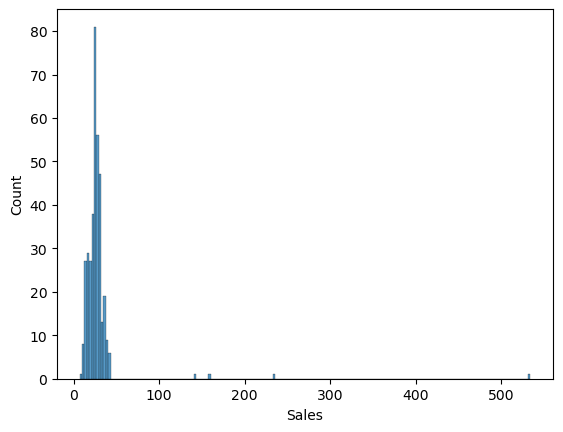

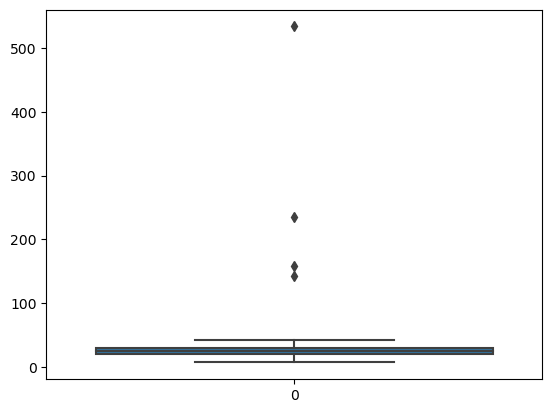

In [6]:
for col in df.columns:
    print(col)
    sns.histplot(df[col])
    plt.show()
    sns.boxplot(df[col])

    plt.show()

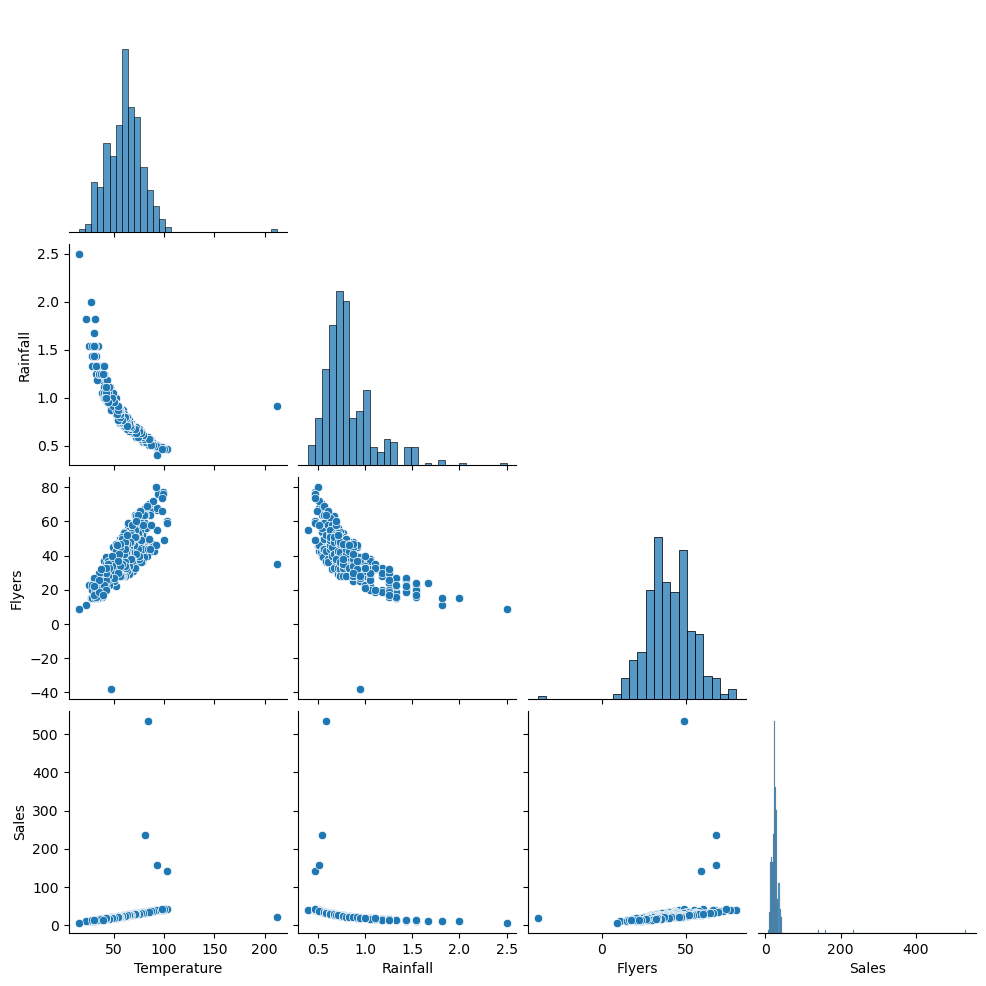

In [7]:
sns.pairplot(df, corner=True)

## Use the IQR Range Rule and the upper and lower bounds to identify the lower outliers of each column of lemonade.csv, using the multiplier of 1.5. Do these lower outliers make sense? Which outliers should be kept?

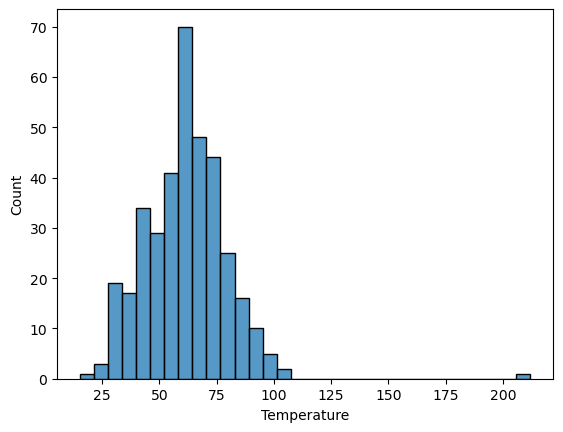


    The lower bound of Temperature is 16.7
    The upper bound of Temperature is 104.7
    


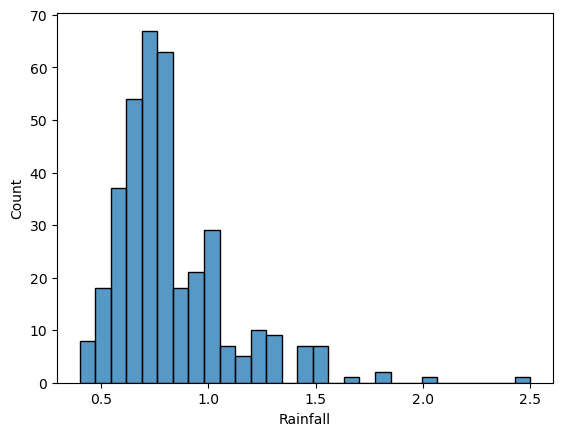


    The lower bound of Rainfall is 0.26
    The upper bound of Rainfall is 1.3
    


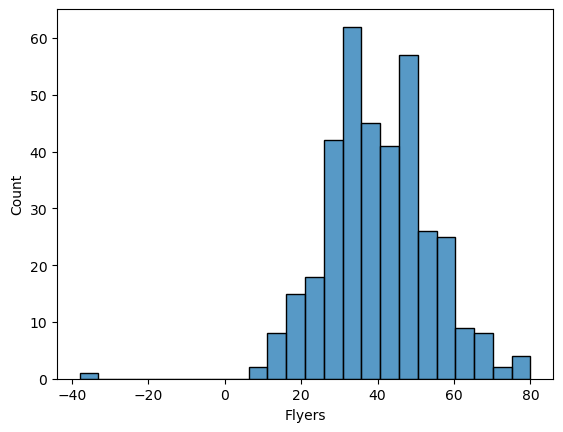


    The lower bound of Flyers is 4.0
    The upper bound of Flyers is 76.0
    


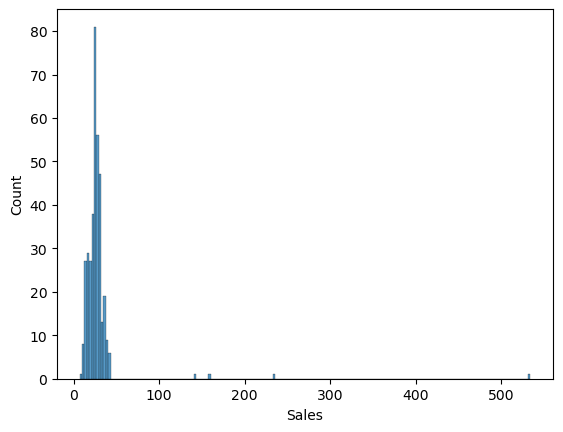


    The lower bound of Sales is 5.0
    The upper bound of Sales is 45.0
    


In [8]:
for col in df.columns:
    lower_bound, upper_bound = get_lower_upper_bounds(df[col], 1.5)
    sns.histplot(df[col])
    plt.show()
    print(f"""
    The lower bound of {col} is {round(lower_bound, 2)}
    The upper bound of {col} is {round(upper_bound, 2)}
    """)

### Findings: all the outliers seem to make sense, I'm going to decide to keep outliers up to 1.6 on rainfall though because they seem meaningully connected to the rest of the distribution
#

## Using the multiplier of 3, IQR Range Rule, and the lower bounds, identify the outliers below the lower bound in each colum of lemonade.csv. Do these lower outliers make sense? Which outliers should be kept?

## Using the multiplier of 3, IQR Range Rule, and the upper bounds, identify the outliers above the upper_bound in each colum of lemonade.csv. Do these upper outliers make sense? Which outliers should be kept?

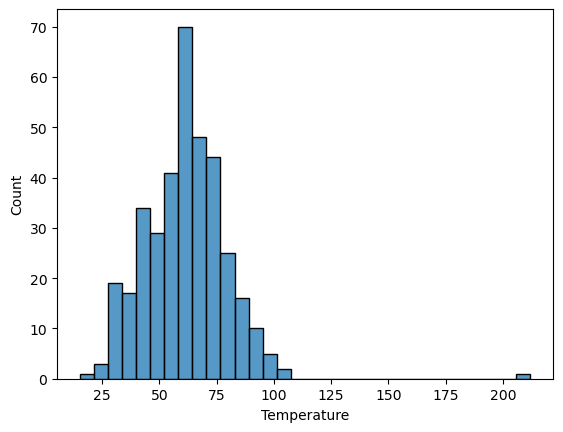


    The lower bound of Temperature is -16.3
    The upper bound of Temperature is 137.7
    


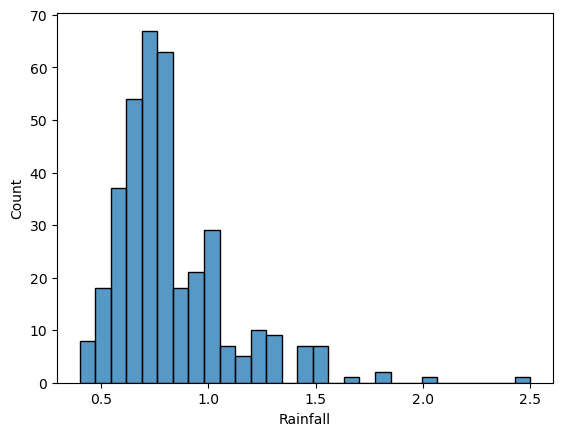


    The lower bound of Rainfall is -0.13
    The upper bound of Rainfall is 1.69
    


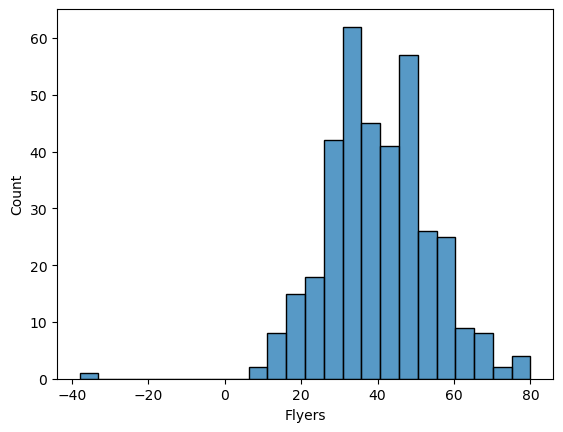


    The lower bound of Flyers is -23.0
    The upper bound of Flyers is 103.0
    


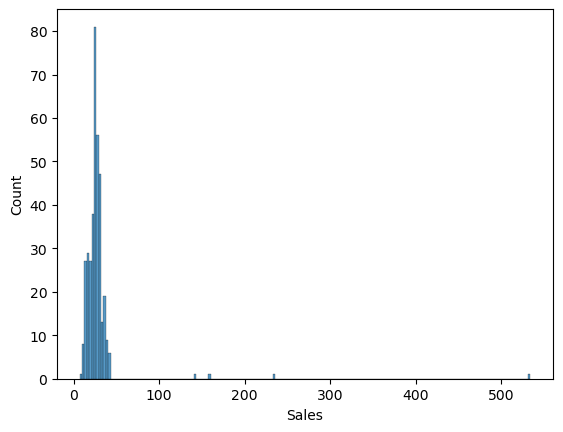


    The lower bound of Sales is -10.0
    The upper bound of Sales is 60.0
    


In [9]:
for col in df.columns:
    lower_bound, upper_bound = get_lower_upper_bounds(df[col], 3)
    sns.histplot(df[col])
    plt.show()
    print(f"""
    The lower bound of {col} is {round(lower_bound, 2)}
    The upper bound of {col} is {round(upper_bound, 2)}
    """)

### Findings: a multiplier of 3 seems to be more meaningful than 1.5 at separating outliers from the main body of the distribution
#

## Identify if any columns in lemonade.csv are normally distributed. For normally distributed columns:

### Findings: Flyers and temperature are normally distributed. Sales and rainfall are close but not as definitively normal as flyers and temperature.

## Use a 2 sigma decision rule to isolate the outliers.

In [10]:
for col in df.columns:
    df[f'{col}_zscore'] = (df[col] - df[col].mean()) / df[col].std()

/var/folders/hm/5nkmcj9j3j9fwnby33yssbwm0000gp/T/ipykernel_71443/611545655.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[f'{col}_zscore'] = (df[col] - df[col].mean()) / df[col].std()
/var/folders/hm/5nkmcj9j3j9fwnby33yssbwm0000gp/T/ipykernel_71443/611545655.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[f'{col}_zscore'] = (df[col] - df[col].mean()) / df[col].std()


In [11]:
df

,Temperature,Rainfall,Flyers,Sales,Temperature_zscore,Rainfall_zscore,Flyers_zscore,Sales_zscore
0,27.0,2.00,15,10,-1.892340,4.286488,-1.820927,-0.577281
1,28.9,1.33,15,13,-1.787286,1.840253,-1.820927,-0.480344
2,34.5,1.33,27,15,-1.477652,1.840253,-0.950507,-0.415720
3,44.1,1.05,28,17,-0.946852,0.817946,-0.877972,-0.351096
4,42.4,1.00,33,18,-1.040848,0.635391,-0.515297,-0.318783
...,...,...,...,...,...,...,...,...
360,42.7,1.00,33,19,-1.024260,0.635391,-0.515297,-0.286471
361,37.8,1.25,32,16,-1.295189,1.548165,-0.587832,-0.383408
362,39.5,1.25,17,15,-1.201194,1.548165,-1.675857,-0.415720
363,30.9,1.43,22,13,-1.676702,2.205363,-1.313182,-0.480344


In [33]:
cols = ['Temperature', 'Flyers']
for col in cols:
    print(col)
    display(df[df[f'{col}_zscore'].abs() >= 2])


Temperature


,Temperature,Rainfall,Flyers,Sales,Temperature_zscore,Rainfall_zscore,Flyers_zscore,Sales_zscore
41,212.0,0.91,35,21,8.336627,0.306792,-0.370227,-0.221847
166,99.3,0.47,77,41,2.105251,-1.299691,2.676244,0.424395
176,102.6,0.47,60,42,2.287714,-1.299691,1.443149,0.456708
181,102.9,0.47,59,143,2.304301,-1.299691,1.370614,3.720233
190,98.0,0.49,66,40,2.033372,-1.226669,1.878359,0.392083
198,99.3,0.47,76,41,2.105251,-1.299691,2.603709,0.424395
202,99.6,0.47,49,42,2.121838,-1.299691,0.645264,0.456708
207,97.9,0.47,74,43,2.027843,-1.299691,2.458639,0.489020
338,22.0,1.82,11,10,-2.168799,3.629291,-2.111067,-0.577281
364,15.1,2.50,9,7,-2.550311,6.112037,-2.256137,-0.674217


Flyers


,Temperature,Rainfall,Flyers,Sales,Temperature_zscore,Rainfall_zscore,Flyers_zscore,Sales_zscore
166,99.3,0.47,77,41,2.105251,-1.299691,2.676244,0.424395
170,85.1,0.54,70,37,1.320109,-1.044114,2.168499,0.295147
171,94.3,0.47,76,41,1.828792,-1.299691,2.603709,0.424395
182,93.4,0.51,68,158,1.779030,-1.153647,2.023429,4.204914
183,81.5,0.54,68,235,1.121058,-1.044114,2.023429,6.692948
194,92.0,0.50,80,40,1.701621,-1.190158,2.893849,0.392083
198,99.3,0.47,76,41,2.105251,-1.299691,2.603709,0.424395
203,89.1,0.51,72,37,1.541275,-1.153647,2.313569,0.295147
204,83.5,0.57,69,35,1.231642,-0.934581,2.095964,0.230523
207,97.9,0.47,74,43,2.027843,-1.299691,2.458639,0.489020


## Do these make sense?

### A: Yes, the outliers identified in temperature represent extreme temperature values and the flyer outliers identified are very high, extremely low, or negative

## Should certain outliers be kept or removed?

### A: the high-end flyer outliers seem to be cutting off before the body of the normal distribution is finished so in this case I would keep all of them

## Now use a 3 sigma decision rule to isolate the outliers in the normally distributed columns from lemonade.csv

In [34]:
for col in cols:
    print(col)
    display(df[df[f'{col}_zscore'].abs() >= 3])


Temperature


,Temperature,Rainfall,Flyers,Sales,Temperature_zscore,Rainfall_zscore,Flyers_zscore,Sales_zscore
41,212.0,0.91,35,21,8.336627,0.306792,-0.370227,-0.221847


Flyers


,Temperature,Rainfall,Flyers,Sales,Temperature_zscore,Rainfall_zscore,Flyers_zscore,Sales_zscore
324,47.0,0.95,-38,20,-0.786506,0.452836,-5.665283,-0.254159


## Do these make sense?

### A: yes, they seem to match up with outliers on the histogram very nicely

## Should certain outliers be kept or removed?

### A: All of these outliers seem safe to remove